In [ ]:
from IPython.display import YouTubeVideo
# Required imports
import json
import re
import zipfile as zp
import pandas as pd
import numpy as np
import emoji
import random
import pygal
import user_agents
#flask example (example.zip musi być w katalogu głównym)
import sys
sys.path.append('..')
sys.path.append('../posts')
from preprocess import preprocess, _aux_get_structure


In [ ]:
zip_path = "/home/jacek/Pobrane/Okon_Slowacki_30_11_2020.zip"
# zip_path = "/home/jacek/Pobrane/facebook-jacekstasiak75 222.zip"
# zip_path = "/home/jacek/Pobrane/facebook-jacekstasiak75.zip"
# zip_path = "/home/jacek/Pobrane/win10 unpacked/facebook-okoń 28-12-20.zip"
# zip_path = "/home/jacek/Pobrane/facebook-janpodkowa98.zip"

data = None
acc_activity = None
with zp.ZipFile(zip_path) as zip_file:
#     data = gen_pandas_table(zip_file)
    data = preprocess(zip_file)


In [ ]:
group_join = None
with zp.ZipFile(zip_path) as zip_file:
    folders = _aux_get_structure(zip_file)
    try:
        with zip_file.open('groups/your_group_membership_activity.json') as f:
            jdata = json.loads(f.read())

            names = []
            times = []

            for i in jdata['groups_joined']:
                times.append(i['timestamp'])
#                 likes.append(i['title'])

            temp_table = pd.DataFrame({'time': times})
            temp_table.time = pd.to_datetime(temp_table.time, unit='s')
            group_join = temp_table
#             like_table = pd.concat([like_table, temp_table])
    except:
        pass

In [44]:
group_interactions = None
with zp.ZipFile(zip_path) as zip_file:
    folders = _aux_get_structure(zip_file)
    try:
#     if True:
        with zip_file.open('interactions/groups.json') as f:
            jdata = json.loads(f.read())

            names = []
            values = []
            
            regx = re.compile(r'^(\d+)')
            for huh in jdata['group_interactions']:
                for i in huh['entries']:
                    value = re.findall(regx, i['data']['value'])
                    if len(value) == 0:
                        continue

                    values.append(int(value[0]))
                    names.append(i['data']['name'].encode('latin1').decode('utf8'))
            group_interactions = pd.DataFrame({'name': names, 'value': values})
    except Exception as e:
        print('aaa', e)
        pass


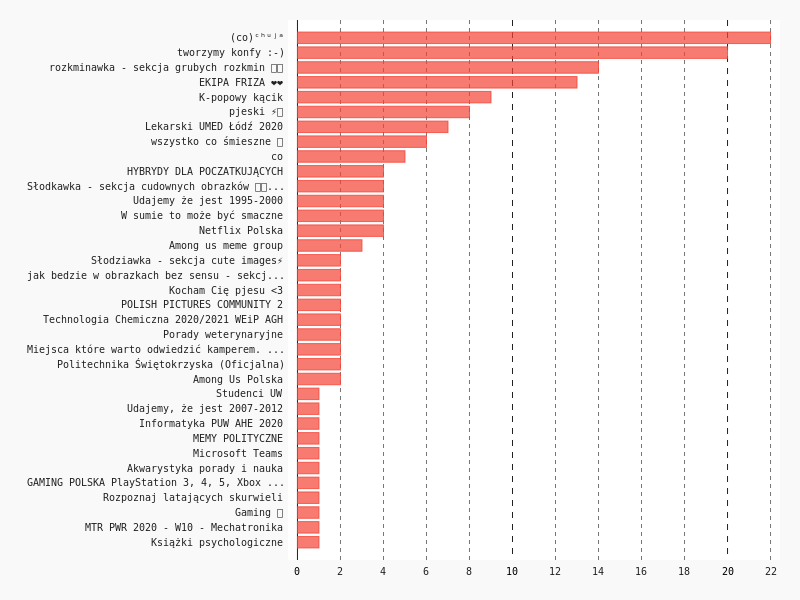

In [46]:
# group_interactions
MAX_GROUP_COUNT = 40
MAX_TITLE_LEN = 40

def shorten_title(s):
    if len(s) > MAX_TITLE_LEN:
        s = s[:MAX_TITLE_LEN] + '...'
    return s

group_inter = group_interactions.sort_values(by='value').tail(MAX_GROUP_COUNT)

group_chart = pygal.HorizontalBar(show_legend=False)
group_chart.x_labels = list(map(shorten_title, list(group_inter.name)))
group_chart.add('', list(group_inter.value))